# Titanic data set

In [133]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [134]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [135]:
test_x=test.drop('PassengerId',1)
train_x=train.drop('PassengerId',1)

In [136]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## The ticket column is probably not important. There is seemingly no patterns in there. We will drop this column.

In [137]:
train_x=train_x.drop(['Ticket'],1)
test_x=test_x.drop(['Ticket'],1)

In [138]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


## Let's see which columns have missing values.

In [139]:
print(train_x.isnull().sum() /train_x.shape[0])
print(test_x.isnull().sum() /test_x.shape[0])

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Fare        0.002392
Cabin       0.782297
Embarked    0.000000
dtype: float64


## Most of the cabin information is unknown. We could either choose to drop this column, or assume that people with Cabin = 'NaN' simply didn't have a cabin. We will go with this second assumption for now. For the age, we will replace the missing values with the median age.

In [140]:
median_age=np.median(train_x['Age'].dropna())
train_x['Age']=train_x['Age'].fillna(median_age)
median_age=np.median(test_x['Age'].dropna())
test_x['Age']=test_x['Age'].fillna(median_age)
train_x['Age'].head(5)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [141]:
train_x.loc[train_x['Cabin'].isnull(), 'Cabin'] = 0
train_x.loc[train_x['Cabin'] != 0, 'Cabin'] = 1
test_x.loc[test_x['Cabin'].isnull(), 'Cabin'] = 0
test_x.loc[test_x['Cabin'] != 0, 'Cabin'] = 1

## Let's see what we have so far

In [142]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S


## Does it matter where a passenger embarks from? Maybe. We will assign a numeric value to each of the Embarked zones.

In [143]:
train_x['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## First we will replace nan values with the max of (S, C, Q). Then we assign an int to each value.

In [144]:
print(train_x['Embarked'][train_x['Embarked']=='S'].count())
print(train_x['Embarked'][train_x['Embarked']=='C'].count())
print(train_x['Embarked'][train_x['Embarked']=='Q'].count())
train_x['Embarked']=train_x['Embarked'].fillna('S')
test_x['Embarked']=test_x['Embarked'].fillna('S')

644
168
77


In [145]:
train_x['Embarked']=train_x['Embarked'].replace({'S': 0, 'C': 1, 'Q':2})
test_x['Embarked']=test_x['Embarked'].replace({'S': 0, 'C': 1, 'Q':2})

In [146]:
#No more empty values
print(train_x.isnull().sum() /train_x.shape[0])
print(test_x.isnull().sum() /test_x.shape[0])

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Cabin       0.0
Embarked    0.0
dtype: float64
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.002392
Cabin       0.000000
Embarked    0.000000
dtype: float64


In [147]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0


## Replace male by 0 and female by 1. Alternatively we could one-hot encode these variables for better param learning.

In [148]:
train_x['Sex']=train_x['Sex'].replace('male',0)
train_x['Sex']=train_x['Sex'].replace('female',1)
test_x['Sex']=test_x['Sex'].replace('male',0)
test_x['Sex']=test_x['Sex'].replace('female',1)

In [149]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0


## Let's check how the indicators are linearly correlated with the survival.

In [150]:
train_x.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Embarked    0.106811
Fare        0.257307
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

## The sex, the fare, the class and the embarkment location seem to have some correlation with the survival rate. The others are not well correlated. Can we engineer better features?

## Let's see  how the fare price is distributed in order to bin the values.

In [151]:
print(train_x['Fare'].max())
print(train_x['Fare'].std())

512.3292
49.693428597180905


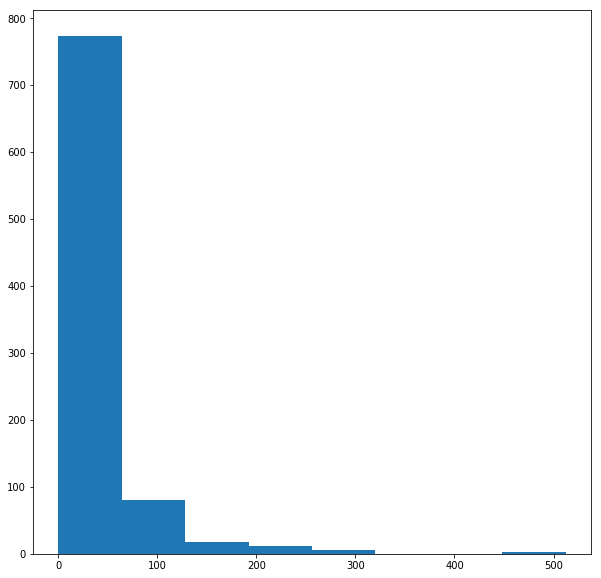

In [152]:
fig = plt.figure(figsize=(10,10))
ax1=fig.add_subplot(1,1,1)
values=ax1.hist(train_x['Fare'], bins=8)

In [153]:
values

(array([ 773.,   80.,   18.,   11.,    6.,    0.,    0.,    3.]),
 array([   0.     ,   64.04115,  128.0823 ,  192.12345,  256.1646 ,
         320.20575,  384.2469 ,  448.28805,  512.3292 ]),
 <a list of 8 Patch objects>)

## How would the correlation between fare and survival change if we bin this values?

In [154]:
for i in range(1,len(values[1])):
    train_x.loc[(train_x['Fare'] < values[1][i]) & (train_x['Fare'] >= values[1][i-1]),'Fare'] = i-1
    test_x.loc[(test_x['Fare'] < values[1][i]) & (test_x['Fare'] >= values[1][i-1]),'Fare'] = i-1
train_x.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Fare        0.077668
Parch       0.081629
Embarked    0.106811
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

## The linear correlation dropped from 0.25 to 0.10. We cannot say if this reduces the effectiveness of prediction simply because the linear correlation value dropped. It might actually help fight overfitting. We will test this in the prediction part.

In [155]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,0.0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1.0,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,0.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0.0,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,0.0,0,0


## Let's see  how the fare price is distributed in order to bin the values.

In [156]:
print(train_x['Age'].max())
print(train_x['Age'].min())
print(train_x['Age'].std())

80.0
0.42
13.019696550973194


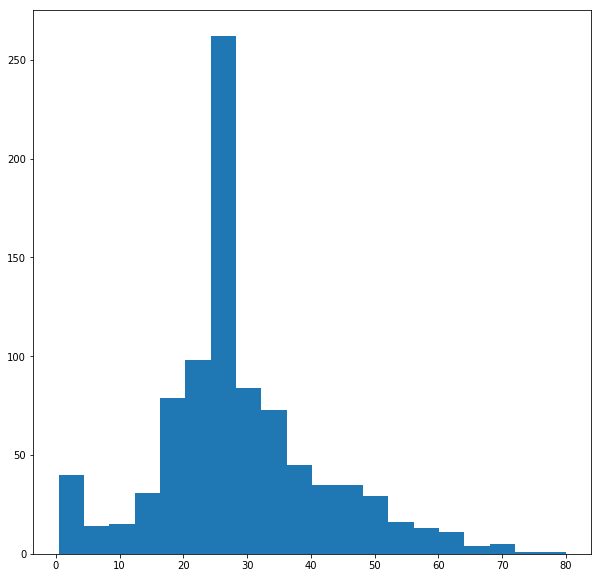

In [157]:
fig = plt.figure(figsize=(10,10))
ax1=fig.add_subplot(1,1,1)
values=ax1.hist(train_x['Age'], bins=20)

In [158]:
values

(array([  40.,   14.,   15.,   31.,   79.,   98.,  262.,   84.,   73.,
          45.,   35.,   35.,   29.,   16.,   13.,   11.,    4.,    5.,
           1.,    1.]),
 array([  0.42 ,   4.399,   8.378,  12.357,  16.336,  20.315,  24.294,
         28.273,  32.252,  36.231,  40.21 ,  44.189,  48.168,  52.147,
         56.126,  60.105,  64.084,  68.063,  72.042,  76.021,  80.   ]),
 <a list of 20 Patch objects>)

In [159]:
for i in range(1,len(values[1])):
    train_x.loc[(train_x['Age'] < values[1][i]) & (train_x['Age'] >= values[1][i-1]),'Age'] = i-1
    test_x.loc[(test_x['Age'] < values[1][i]) & (test_x['Age'] >= values[1][i-1]),'Age'] = i-1
train_x.corr()['Survived'].sort_values()

Pclass     -0.338481
SibSp      -0.035322
Age        -0.030261
Fare        0.077668
Parch       0.081629
Embarked    0.106811
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

## The linear correlation changed from -0.06 to -0.03. We cannot say if this reduces the effectiveness of prediction simply because the linear correlation value dropped. It might actually help fight overfitting. We will test this in the prediction part.

In [160]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,5.0,1,0,0.0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,9.0,1,0,1.0,1,1
2,1,3,"Heikkinen, Miss. Laina",1,6.0,0,0,0.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,8.0,1,0,0.0,1,0
4,0,3,"Allen, Mr. William Henry",0,8.0,0,0,0.0,0,0


# PREDICTIONS

In [161]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV as GS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

rfc = RFC()
scores = cross_val_score(rfc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
abc= ABC()
scores = cross_val_score(abc,train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
svc= SVC()
scores = cross_val_score(svc,train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())

Cross-validated scores: 0.793628135285
Cross-validated scores: 0.812604698672
Cross-validated scores: 0.824927647259


## RFC with grid search

In [162]:
parameters = {'n_estimators':(10,20,40,70),
                'criterion':("gini","entropy"),
              'max_depth':(None, 1, 2, 4, 6),
              'min_samples_split': (2, 3, 4)
              
             }

gs = GS(estimator=RFC(random_state=9999), param_grid=parameters,n_jobs=-1,verbose=True,cv=10)
gs.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 307 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 1185 out of 1200 | elapsed:   20.4s remaining:    0.2s


Best score: 0.833
Best parameters set:
	criterion: 'entropy'
	max_depth: 6
	min_samples_split: 4
	n_estimators: 10


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   20.6s finished


In [163]:
rfc=RFC(n_estimators=10, max_depth=6,min_samples_split=4,criterion='entropy',random_state=9999 )
rfc.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
rfc.feature_importances_

array([ 0.12832262,  0.46258163,  0.10475503,  0.08294012,  0.0473934 ,
        0.05678201,  0.07351233,  0.04371286])

## Results of RFC

### With age and fare binning, accurac

## ABC with grid search

In [96]:
parameters = {
              'n_estimators':(50,10,20,30,100),
             'learning_rate':(1.0,0.2,0.5,0.9,0.4,2,4,5)
             }

gs = GS(estimator=ABC(), param_grid=parameters,n_jobs=-1,verbose=True,cv=10)
gs.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 385 out of 400 | elapsed:   11.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   12.2s finished


Best score: 0.816
Best parameters set:
	learning_rate: 0.9
	n_estimators: 50


In [97]:
abc=ABC(n_estimators= 50, learning_rate=0.9)
abc.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
abc.feature_importances_

array([ 0.02,  0.06,  0.4 ,  0.08,  0.04,  0.36,  0.02,  0.02])

## SVC with grid search

In [ ]:
parameters = {
              'C':(0.001,0.01,0.1,1,10,20,50,100,1000),
             }

gs = GS(estimator=SVC(kernel='linear'), param_grid=parameters,n_jobs=2,verbose=True,cv=3)
gs.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
      print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [130]:
svc=SVC()
svc.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [164]:
test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].dropna().median())
res=rfc.predict(test_x.drop('Name',1))

In [166]:
n_points = res.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = test['PassengerId']
y_pred_pp[:, 1] = res
np.savetxt('rfc.csv', y_pred_pp, fmt='%d', delimiter=',',header="PassengerId,Survived",comments='')